In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib as mpl
mpl.style.use('seaborn-notebook')

In [2]:
df_duncan = pd.read_csv("data/Duncan.csv", sep=",")
df_duncan

,name,type,income,education,prestige
0,accountant,prof,62,86,82
1,pilot,prof,72,76,83
2,architect,prof,75,92,90
3,author,prof,55,90,76
4,chemist,prof,64,86,90
5,minister,prof,21,84,87
6,professor,prof,64,93,93
7,dentist,prof,80,100,90
8,reporter,wc,67,87,52
9,engineer,prof,72,86,88


In [3]:
X_name, X_type, X_income, X_education, X_prestige = \
           [df_duncan[name].values for name in ('name','type','income', 'education', 'prestige')]

In [4]:
X_income = X_income.astype('d')
X_prestige = X_prestige.astype('d')
X_education = X_education.astype('d')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


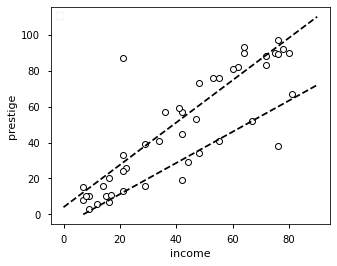

In [9]:
plt.figure(figsize=(5.0,4.0))
# plt.figure(figsize=(15,12))
plt.scatter(X_income, X_prestige, s=36, c='w', edgecolors='k', linewidth=1.0)
# plt.title("Доход и престиж")
plt.plot([7, 90], [0, 72], linestyle='--', color='k')
plt.plot([0, 90], [4, 110], linestyle='--', color='k')
# for x_name, x_income, x_prestige in zip(X_name, X_income, X_prestige):
#     plt.text(x_income, x_prestige+2, x_name)
plt.xlabel('income')
plt.ylabel('prestige')
plt.legend()
plt.savefig('fig/kmeans_regression_duncan_income_prestige.eps')
plt.show()

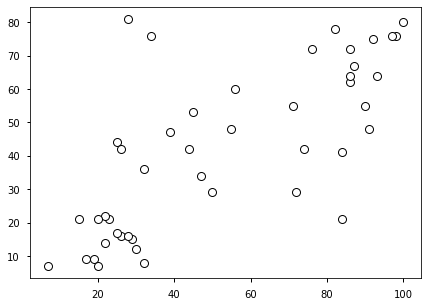

In [6]:
plt.figure(figsize=(7,5))
#plt.figure(figsize=(15,12))
plt.scatter(X_education, X_income, s=64, c='w', edgecolors='k', linewidth=1.0)
# plt.plot([7, 90], [0, 72], linestyle='--', label='1', color='k')
# plt.plot([0, 90], [4, 110], linestyle='--', label='2', color='k')
# for x_name, x_education, x_income in zip(X_name, X_education, X_income):
#     plt.text(x_education, x_income+2, x_name)
# plt.xlabel('Доход')
# plt.ylabel('Престиж')
# plt.legend()
plt.show()

In [7]:
import mlgrad
import mlgrad.model as ml_model
import mlgrad.risk as ml_risk
import mlgrad.loss as ml_loss
import mlgrad.weights as ml_weights
import mlgrad.func as ml_func
import mlgrad.af as ml_af
import mlgrad.gd as ml_gd

In [8]:
layer = ml_model.GeneralModelLayer(2)
linmod1 = ml_model.TLinearModel(2)
linmod2 = ml_model.TLinearModel(2)
layer.append(linmod1)
layer.append(linmod2)
nn = ml_model.FFNetworkModel()
nn.add(layer)

nn.allocate()
nn.init_param()

In [9]:
X = np.c_[X_income, X_prestige]
Y = np.zeros(len(X), 'd')

In [10]:
minloss = ml_loss.SoftMinLoss2(ml_loss.ErrorLoss(ml_func.Square()), 2, a=15)
tone_risk = ml_risk.ER21(X, Y, nn, minloss)

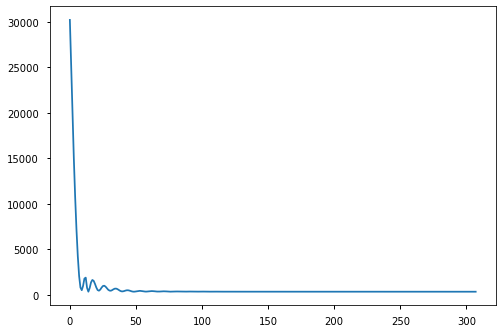

In [11]:
tone_alg = mlgrad.erm_fg(tone_risk, n_restart=1, h=0.1, normalizer=ml_gd.LinearModelNormalizer())

plt.plot(tone_alg.lvals)
plt.show()

In [12]:
print(np.array(linmod1.param))
print(np.array(linmod2.param))
tone_alg.K

[-0.5418696  -0.25698791  0.20237248]
[-0.76399905  0.32501664 -0.4513006 ]


307

In [13]:
o_linmod1 = ml_model.LinearModel(-linmod1.param.base[:-1] / linmod1.param.base[-1])
o_linmod2 = ml_model.LinearModel(-linmod2.param.base[:-1] / linmod2.param.base[-1])

In [14]:
print(np.array(o_linmod1.param))
print(np.array(o_linmod2.param))


[2.67758544 1.26987579]
[-1.69288287  0.72017772]


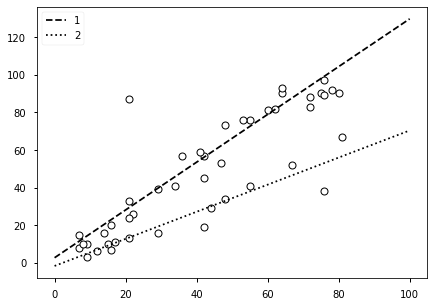

In [15]:
plt.figure(figsize=(7,5))
# plt.figure(figsize=(15,12))
plt.scatter(X[:,0], X[:,1], s=49, c='w', edgecolors='k', linewidth=1.0)
# plt.title("Соотношения тонов")
plt.plot([0., 100.], o_linmod1.evaluate_all(np.array([[0.], [100.]])), linestyle='--', label='1', color='k')
plt.plot([0., 100.], o_linmod2.evaluate_all(np.array([[0.], [100.]])), linestyle=':', label='2', color='k')
# for x_name, x_income, x_prestige in zip(X_name, X_income, X_prestige):
#     plt.text(x_income, x_prestige+2, x_name)
# plt.xlabel('Фактическое соотношение тонов')
# plt.ylabel('Воспринимаемое соотношение тонов')
# plt.ylim(1.2, 3.1)
# plt.xlim(1.2, 3.1)
plt.legend()
# plt.savefig('fig/tonedata_scatter.eps')
plt.show()

In [30]:
layer_rob = ml_model.GeneralModelLayer(2)
rob_linmod1 = ml_model.TLinearModel(2)
rob_linmod2 = ml_model.TLinearModel(2)
layer_rob.append(rob_linmod1)
layer_rob.append(rob_linmod2)
nn_rob = ml_model.FFNetworkModel()
nn_rob.add(layer_rob)

nn_rob.allocate()
nn_rob.init_param()


In [31]:
minloss = ml_loss.SoftMinLoss2(ml_loss.RelativeErrorLoss(ml_func.Square()), 2, a=15)
tone_rob_risk = ml_risk.ER21(X, Y, nn_rob, minloss)
agg_func = ml_af.averaging_function("WM", alpha=0.95)
weights_tone = ml_weights.MWeights(agg_func, tone_rob_risk)

38616.81274162542


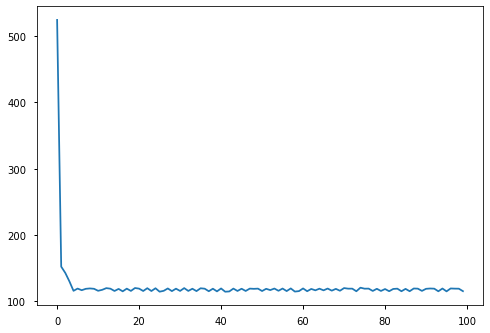

In [32]:
fg_tone = mlgrad.fg(tone_rob_risk, h=0.001, normalizer=ml_gd.LinearModelNormalizer())
tone_rob_alg = mlgrad.erm_irgd(fg_tone, weights_tone)

plt.plot(tone_rob_alg.lvals)
plt.show()

In [33]:
print(np.array(rob_linmod1.param))
print(np.array(rob_linmod2.param))
tone_rob_alg.K

[ 1.33803343 -0.15979156  0.18890122]
[ 0.76214568  0.46595738 -0.37523415]


100

In [34]:
o_rob_linmod1 = ml_model.LinearModel(-rob_linmod1.param.base[:-1]/rob_linmod1.param.base[-1])
o_rob_linmod2 = ml_model.LinearModel(-rob_linmod2.param.base[:-1]/rob_linmod2.param.base[-1])

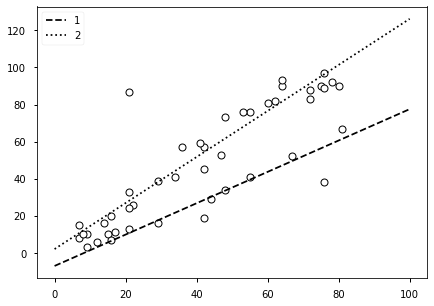

In [35]:
plt.figure(figsize=(7,5))
# plt.figure(figsize=(15,12))
plt.scatter(X[:,0], X[:,1], s=49, c='w', edgecolors='k', linewidth=1.0)
# plt.title("Соотношения тонов")
plt.plot([0., 100.], o_rob_linmod1.evaluate_all(np.array([[0.], [100.]])), linestyle='--', label='1', color='k')
plt.plot([0., 100.], o_rob_linmod2.evaluate_all(np.array([[0.], [100.]])), linestyle=':', label='2', color='k')
# for x_name, x_income, x_prestige in zip(X_name, X_income, X_prestige):
#     plt.text(x_income, x_prestige+2, x_name)
# plt.xlabel('Фактическое соотношение тонов')
# plt.ylabel('Воспринимаемое соотношение тонов')
# plt.ylim(1.2, 3.1)
# plt.xlim(1.2, 3.1)
plt.legend()
# plt.savefig('fig/tonedata_scatter.eps')
plt.show()

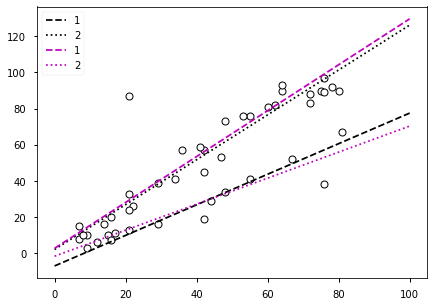

In [36]:
plt.figure(figsize=(7,5))
# plt.figure(figsize=(15,12))
plt.scatter(X[:,0], X[:,1], s=49, c='w', edgecolors='k', linewidth=1.0)
# plt.title("Соотношения тонов")
plt.plot([0., 100.], o_rob_linmod1.evaluate_all(np.array([[0.], [100.]])), linestyle='--', label='1', color='k')
plt.plot([0., 100.], o_rob_linmod2.evaluate_all(np.array([[0.], [100.]])), linestyle=':', label='2', color='k')
plt.plot([0., 100.], o_linmod1.evaluate_all(np.array([[0.], [100.]])), linestyle='--', label='1', color='m')
plt.plot([0., 100.], o_linmod2.evaluate_all(np.array([[0.], [100.]])), linestyle=':', label='2', color='m')
# for x_name, x_income, x_prestige in zip(X_name, X_income, X_prestige):
#     plt.text(x_income, x_prestige+2, x_name)
# plt.xlabel('Фактическое соотношение тонов')
# plt.ylabel('Воспринимаемое соотношение тонов')
# plt.ylim(1.2, 3.1)
# plt.xlim(1.2, 3.1)
plt.legend()
# plt.savefig('fig/tonedata_scatter.eps')
plt.show()

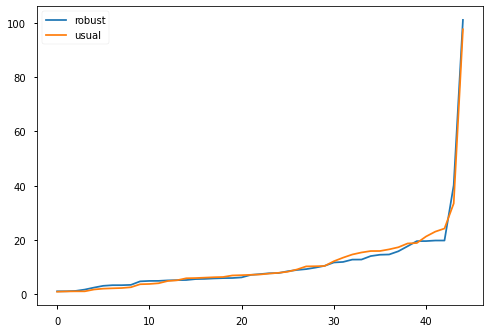

In [37]:
plt.plot(sorted(np.sqrt(tone_rob_risk.evaluate_losses())), label='robust')
plt.plot(sorted(np.sqrt(tone_risk.evaluate_losses())), label='usual')
plt.legend()
plt.show()